# Computing TTR 

In [35]:
import csv
import nltk
import re
import random
from nltk.tokenize import TweetTokenizer as tt
import math
tokens=[]
d=dict()
with open('tweets-dataset.csv','r',encoding="utf8") as csvfile:
    reader1=csv.reader(csvfile)
    c=0
    for i in reader1:
        
        token=tt().tokenize(i[0])
        actual=[]
        for i in token:
            k=re.findall(r"[A-Za-z']+",i)
            if len(k)==1:
                k=[k[0].lower()]
                actual+=k
                if k[0] in d:
                    d[k[0]]+=1
                else:
                    d[k[0]]=1
        tokens+=actual
types=set(tokens)
n_tokens=len(tokens)
n_types=len(types)
print('Number of tokens : '+str(n_tokens))
print('Number of types : '+str(n_types))
print('TTR : '+str(n_types/n_tokens))

Number of tokens : 305493
Number of types : 35406
TTR : 0.11589790928106372


# Zipf's Law of Length

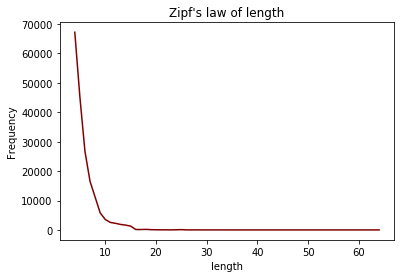

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline  
wordlength_frequency=dict()
for i in tokens:
    if len(i) in wordlength_frequency:
        wordlength_frequency[len(i)]+=1
    else:
        wordlength_frequency[len(i)]=1
words=sorted(wordlength_frequency.items(), key=lambda x: x[1], reverse=True)
words.sort()
x=[i[0] for i in words][3:]
y=[i[1] for i in words][3:]
# started from 4(skipped words of len 1,2 and 3) for neat plot
plt.plot(x,y,color='maroon')
plt.title("Zipf's law of length")
plt.xlabel('length')
plt.ylabel('Frequency')
plt.show()



According to this law $frequency * wordlength = constant$ , In the plot below the graph traces hyperbola $xy=c$, from which we can say that Zipf's law of length holds good.

# Zip's Law of Meanings

[(10, 9), (12, 10), (15, 10), (19, 13), (20, 13), (26, 17), (42, 20), (51, 24), (64, 27), (70, 29), (99, 32), (219, 43)]


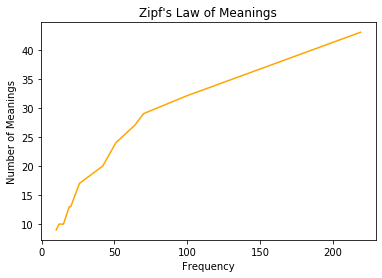

In [42]:
l1=[]
frequency_meanings=dict()

meanings=['sentence','entertainment','card','prestige','new','great','friend','announce','start','park','support','guess','repeat']
l=[10,14,20,13,43,32,24,9,27,13,29,17,10]
# these are number of meanings from thesaurus
for i in range(len(meanings)):
    frequency_meanings[d[meanings[i]]]=l[i]
x_y=sorted(frequency_meanings.items(), key=lambda x: x[0])
print(x_y)
n_meanings=[]
freq=[]
for i in x_y:
    n_meanings.append(i[1])
    freq.append(i[0])
plt.plot(freq,n_meanings,color='orange')
plt.title("Zipf's Law of Meanings")
plt.xlabel('Frequency')
plt.ylabel('Number of Meanings')
plt.show()


This plot seems to be tracing the curve $y=k*sqrt(x)$ so we can say that Zipf's law of meanings holds good


# Heap's Law


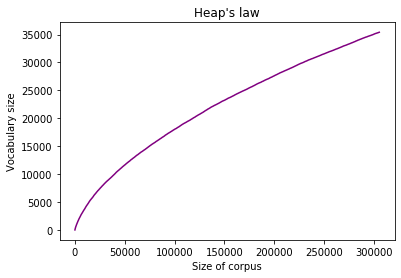

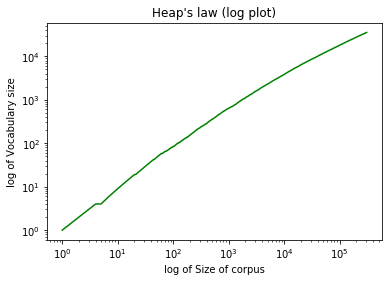

In [43]:
hash_map={}
x=[]
y=[0]
for i in range(len(tokens)):
    x.append(i+1)
    if tokens[i] not in hash_map:
        y.append(y[-1]+1)
        hash_map[tokens[i]]=1
    else:
        y.append(y[-1])
plt.plot(x,y[1:],color='purple')
plt.title("Heap's law")
plt.xlabel('Size of corpus')
plt.ylabel('Vocabulary size')
plt.show()
plt.plot(x,y[1:],color='green')
plt.xscale('log',basex=10)
plt.yscale('log',basey=10)
plt.title("Heap's law (log plot)")
plt.xlabel('log of Size of corpus')
plt.ylabel('log of Vocabulary size')
plt.show()






    

The plot of **log(vocabulary_size) vs log(size_of_corpus)** seems to be almost **linear** hence we can say that **Heap's Law** is satisfied.